# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Read Data

In [6]:
df = pd.read_csv('dataset.csv')

# Data Inspection

In [7]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [8]:
df.shape

(1328, 14)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1328 entries, 0 to 1327
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1328 non-null   int64  
 1   sex       1328 non-null   int64  
 2   cp        1328 non-null   int64  
 3   trestbps  1328 non-null   int64  
 4   chol      1328 non-null   int64  
 5   fbs       1328 non-null   int64  
 6   restecg   1328 non-null   int64  
 7   thalach   1328 non-null   int64  
 8   exang     1328 non-null   int64  
 9   oldpeak   1328 non-null   float64
 10  slope     1328 non-null   int64  
 11  ca        1328 non-null   int64  
 12  thal      1328 non-null   int64  
 13  target    1328 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 145.4 KB


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1328.0,54.418675,9.071150,29.0,48.0,56.0,61.0,77.0
sex,1328.0,0.692771,0.461519,0.0,0.0,1.0,1.0,1.0
cp,1328.0,0.948042,1.029854,0.0,0.0,1.0,2.0,3.0
trestbps,1328.0,131.614458,17.514997,94.0,120.0,130.0,140.0,200.0
chol,1328.0,246.060241,51.627522,126.0,211.0,240.0,275.0,564.0
fbs,1328.0,0.149096,0.356318,0.0,0.0,0.0,0.0,1.0
restecg,1328.0,0.529367,0.527220,0.0,0.0,1.0,1.0,2.0
thalach,1328.0,149.235693,22.975286,71.0,132.0,152.0,166.0,202.0
exang,1328.0,0.334337,0.471936,0.0,0.0,0.0,1.0,1.0
oldpeak,1328.0,1.064232,1.171519,0.0,0.0,0.8,1.8,6.2


# Checking missing values

In [11]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# Checking Outliers

In [12]:
df.shape

(1328, 14)

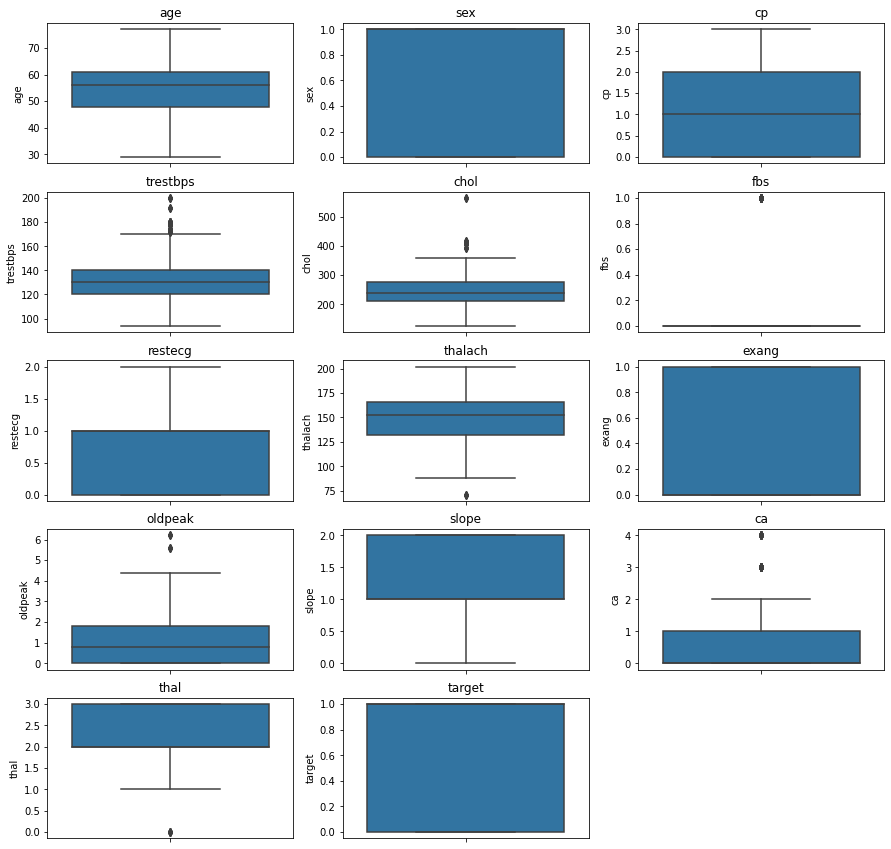

In [13]:
i = 1
plt.figure(figsize=(15,15))
for x in df.columns:
    if i == 15:
        break
    else:
        plt.subplot(5,3,i)
        sns.boxplot(y=df[x])
        plt.title(x)
        #plt.show()
    i+=1

No Outliers, data points are in clusters, some higher data points are acceptable as it is true reading.

# Visualization

In [14]:
data = df.copy()

In [15]:
data.target=data.target.map({0:'Absence',1:'Presence'})

<AxesSubplot:xlabel='target', ylabel='count'>

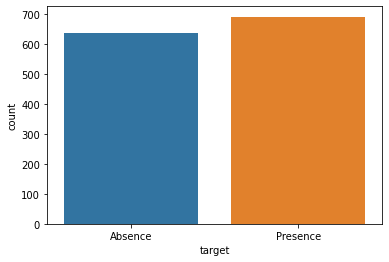

In [16]:
sns.countplot(data.target)

Disease present records are more than absent in this dataset

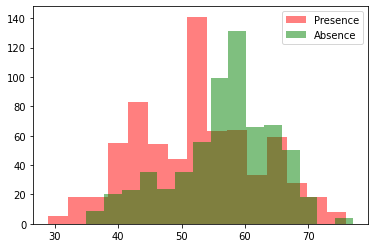

In [17]:
plt.hist(data[data.target=='Presence']['age'],color='r',alpha=0.5,bins=15,label='Presence')
plt.hist(data[data.target=='Absence']['age'],color='g',alpha=0.5,bins=15,label='Absence')
plt.legend()
plt.show()

age range 40 to 60 have lot of risk of having disease

<AxesSubplot:xlabel='sex', ylabel='count'>

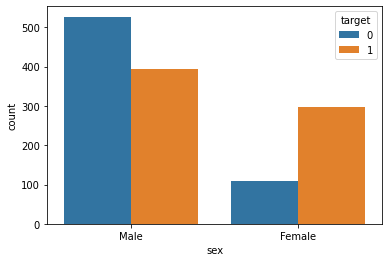

In [34]:
data = df.copy()
data.sex=data.sex.map({0:'Female',1:'Male'})
sns.countplot(data.sex,hue=data.target)

Comparing to Males, it seems more Females are having disease

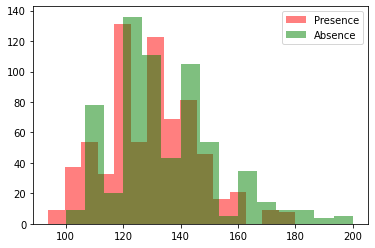

In [22]:
plt.hist(data[data.target=='Presence']['trestbps'],color='r',alpha=0.5,bins=15,label='Presence')
plt.hist(data[data.target=='Absence']['trestbps'],color='g',alpha=0.5,bins=15,label='Absence')
plt.legend()
plt.show()

Resting Blood pressure looks similar for both disease presence and absence

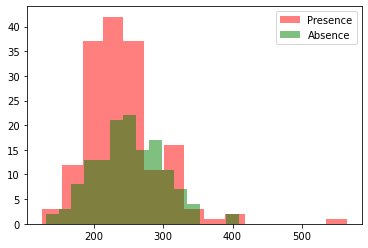

In [165]:
plt.hist(data[data.target=='Presence']['chol'],color='r',alpha=0.5,bins=15,label='Presence')
plt.hist(data[data.target=='Absence']['chol'],color='g',alpha=0.5,bins=15,label='Absence')
plt.legend()
plt.show()

Serum Cholestoral level between 200 to 380 mg/dl have high risk of disease

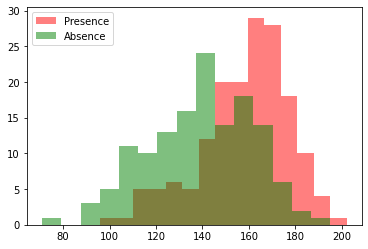

In [169]:
plt.hist(data[data.target=='Presence']['thalach'],color='r',alpha=0.5,bins=15,label='Presence')
plt.hist(data[data.target=='Absence']['thalach'],color='g',alpha=0.5,bins=15,label='Absence')
plt.legend()
plt.show()

Maximun Heart Rate range between 150 to 180 have high risk of having the disease

<AxesSubplot:xlabel='ca', ylabel='count'>

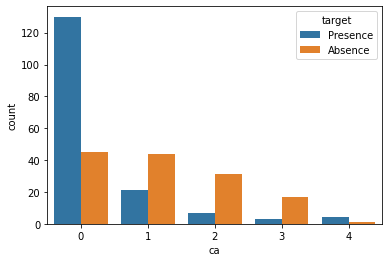

In [174]:
sns.countplot(data.ca,hue=data.target)

Less number of major vessels colored by flourosopy have risk of having the disease

# Create X and Y

In [38]:
X = df.drop('target',axis=1)
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1323,57,0,0,140,241,0,1,123,1,0.2,1,0,3
1324,45,1,3,110,264,0,1,132,0,1.2,1,0,3
1325,68,1,0,144,193,1,1,141,0,3.4,1,2,3
1326,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [39]:
Y = df.target

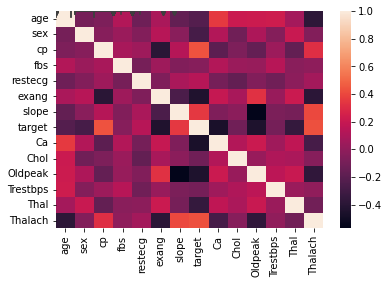

      age  sex  cp  fbs  restecg  exang  slope  target  Ca  Chol  Oldpeak  \
0      52    1   0    0        1      0      2       0   1   212      1.0   
1      53    1   0    1        0      1      0       0   0   203      3.1   
2      70    1   0    0        1      1      0       0   0   174      2.6   
3      61    1   0    0        1      0      2       0   1   203      0.0   
4      62    0   0    1        1      0      1       0   1   275      1.9   
...   ...  ...  ..  ...      ...    ...    ...     ...  ..   ...      ...   
1323   57    0   0    0        1      1      1       0   0   241      0.2   
1324   45    1   3    0        1      0      1       0   0   264      1.2   
1325   68    1   0    1        1      0      1       0   1   193      3.4   
1326   57    1   0    0        1      1      1       0   1   131      1.2   
1327   57    0   1    0        0      0      1       0   1   236      0.0   

      Trestbps  Thal  Thalach  
0          125     3      168  
1          

In [37]:
df_m = df.copy()
import seaborn as sns
from scipy.stats.mstats import winsorize

sns.boxplot(x=df_m['ca'])

df_m['Ca']=winsorize(df_m['ca'],limits=[0.0,0.25])
df_m.drop("ca", axis=1, inplace=True) 
sns.boxplot(x=df_m['Ca'])

sns.boxplot(x=df_m['chol'])

df_m['Chol']=winsorize(df_m['chol'],limits=[0.0,0.25])
sns.boxplot(x=df_m['Chol'])
df_m.drop("chol", axis=1, inplace=True) 

sns.boxplot(x=df_m['oldpeak'])

df_m['Oldpeak']=winsorize(df_m['oldpeak'],limits=[0.03,0.05])
sns.boxplot(x=df_m['Oldpeak'])
df_m.drop("oldpeak", axis=1, inplace=True) 

#Box Plot
sns.boxplot(x=df_m['trestbps'])

# Winsorization
df_m['Trestbps']=winsorize(df_m['trestbps'],limits=[0.0,0.25])
sns.boxplot(x=df_m['Trestbps'])
df_m.drop("trestbps", axis=1, inplace=True) 

sns.boxplot(x=df_m['thal'])

df_m['Thal']=winsorize(df_m['thal'],limits=[0.03,0.05])
sns.boxplot(x=df_m['Thal'])
df_m.drop("thal", axis=1, inplace=True) 


sns.boxplot(x=df_m['thalach'])

df_m['Thalach']=winsorize(df_m['thalach'],limits=[0.03,0.05])
sns.boxplot(x=df_m['Thalach'])
df_m.drop("thalach", axis=1, inplace=True) 

import matplotlib.pyplot as plt

heat_map = sns.heatmap(df_m.corr())

plt.show()

#Decision Tree Classifier


from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn import metrics

feature_cols = ["age", "sex", "cp", "Trestbps", "Chol", "fbs", "restecg", "Thalach", "exang", "Oldpeak", "slope", "Ca", "Thal"]
X = df_m[feature_cols] 
y = df_m.target 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

print(df_m)

y_pred = clf.predict(X_test)
print("\n\n->Decision Tree Classifier<-")
print("\nAccuracy:",metrics.accuracy_score(y_test, y_pred))


# Logistic Regression


from sklearn.linear_model import LogisticRegression 


feature_cols = ["age", "sex", "cp", "Trestbps", "Chol", "fbs", "restecg", "Thalach", "exang", "Oldpeak", "slope", "Ca", "Thal"]
x = df_m[feature_cols] 
y = df_m.target 

from sklearn.model_selection import train_test_split 
xtrain, xtest, ytrain, ytest = train_test_split( 
        x, y, test_size = 0.25, random_state = 0) 

from sklearn.preprocessing import StandardScaler 
sc_x = StandardScaler() 
xtrain = sc_x.fit_transform(xtrain) 
xtest = sc_x.transform(xtest) 




classifier = LogisticRegression(random_state = 0) 
classifier.fit(xtrain, ytrain)

y_pred = classifier.predict(xtest) 

from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(ytest, y_pred) 
  
print ("\nConfusion Matrix : \n", cm) 

from sklearn.metrics import accuracy_score 
print("\n\n->Logistic Regression<-")

print ("\nAccuracy : ", accuracy_score(ytest, y_pred))


#Random Forest


feature_cols = ["age", "sex", "cp", "Trestbps", "Chol", "fbs", "restecg", "Thalach", "exang", "Oldpeak", "slope", "Ca", "Thal"]
X = df_m[feature_cols] 
y = df_m.target 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) 

from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=150)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("\n\n->Random Forest<-")
print("\nAccuracy:",metrics.accuracy_score(y_test, y_pred))


#### Naive Bayes####
# Import LabelEncoder
from sklearn import preprocessing



feature_cols = ["age", "sex", "cp", "Trestbps", "Chol", "fbs", "restecg", "Thalach", "exang", "Oldpeak", "slope", "Ca", "Thal"]
X = df_m[feature_cols] 
y = df_m.target 


# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=109) # 70% training and 30% test
#Import Gaussian Naive Bayes model


from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(X_train,y_train)

#Predict Output
y_pred= model.predict(X_test) # 0:Overcast, 2:Mild
#print("Predicted Value:", y_pred)


#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("\n\n->Naive Bayes<-")
print("\nAccuracy:",metrics.accuracy_score(y_test, y_pred))


